### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [5]:
Task_3 = pd.read_csv('Task_3.csv')

In [4]:
Task_3.head(10) # Display the top 10 rows of Dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [6]:
Task_3.shape # Number of rows and columns

(244, 7)

In [7]:
Task_3.info() # Summary information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### Box Plot: Distribution of Total Bill by Day

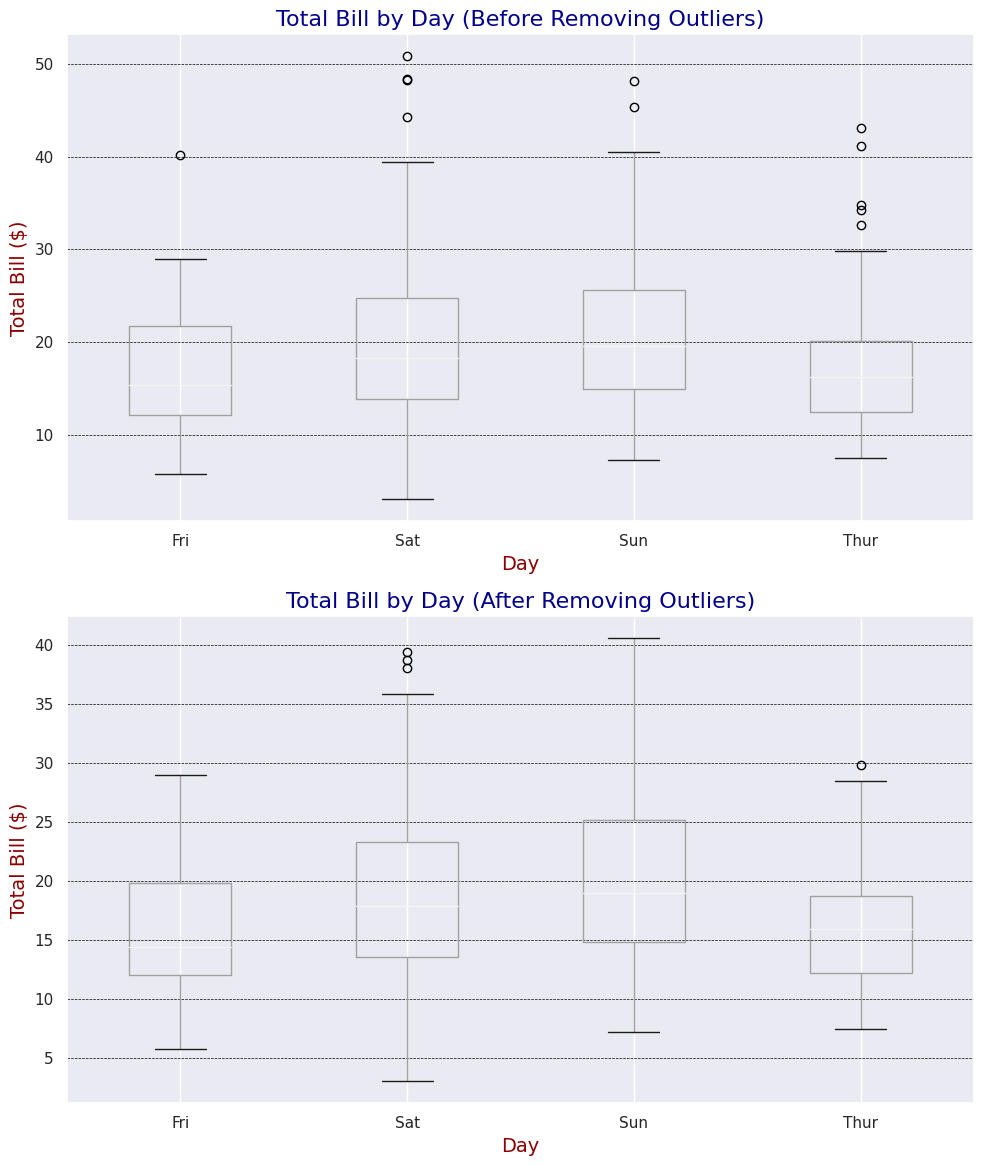

In [86]:
# Function to remove outliers based on Inter Quartile Range (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'total_bill' by 'day'
Task_3_no_outliers = Task_3.groupby('day').apply(lambda group: remove_outliers(group, 'total_bill')).reset_index(drop = True)

# Plot the data before and after removing outliers
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 12))

# Box plot before removing outliers
Task_3.boxplot(column = 'total_bill', by = 'day', ax = axes[0])
axes[0].set_title('Total Bill by Day (Before Removing Outliers)', color = 'darkblue', fontsize = 16)
axes[0].set_xlabel('Day', color = 'darkred', fontsize = 14)
axes[0].set_ylabel('Total Bill ($)', color = 'darkred', fontsize = 14)
axes[0].grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')

# Box plot after removing outliers
Task_3_no_outliers.boxplot(column = 'total_bill', by = 'day', ax = axes[1])
axes[1].set_title('Total Bill by Day (After Removing Outliers)', color = 'darkblue', fontsize = 16)
axes[1].set_xlabel('Day', color = 'darkred', fontsize = 14)
axes[1].set_ylabel('Total Bill ($)', color = 'darkred', fontsize = 14)
axes[1].grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')

plt.suptitle('')  # Suppress the automatic title
plt.tight_layout()
plt.show()

In [87]:
Task_3.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Scatter Plot of Total Bill vs. Tip

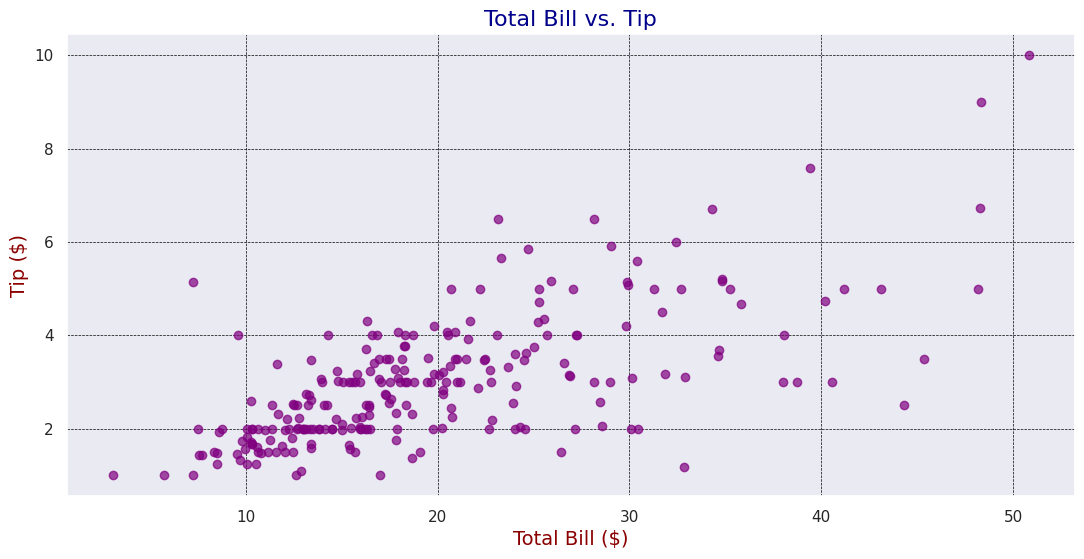

In [82]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.scatter(Task_3['total_bill'], Task_3['tip'], alpha = 0.7, color = 'purple', zorder = 2)
ax.set_title('Total Bill vs. Tip', color = 'darkblue', fontsize = 16)
ax.set_xlabel('Total Bill ($)', color = 'darkred', fontsize = 14)
ax.set_ylabel('Tip ($)', color = 'darkred', fontsize = 14)
ax.grid(True, which ='both', linestyle = '--', color = 'black',linewidth = 0.5)
plt.show()

### Bar Chart: Average total bill per day

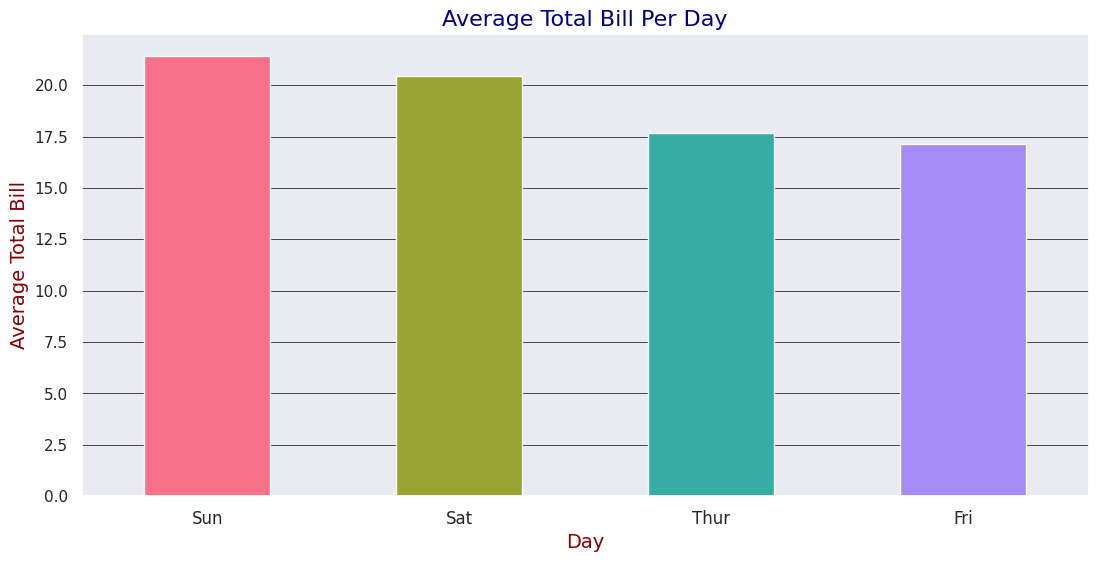

In [79]:
# Generate a color palette for different colors
colors = sns.color_palette('husl', len(Task_3['day'].unique()))

# Group the DataFrame by 'day' and calculate the 'average total bill' for each day
avg_total_bill_per_day = Task_3.groupby('day')['total_bill'].mean()

# Sort the series in ascending order
avg_total_bill_per_day = avg_total_bill_per_day.sort_values(ascending = False)

# Create a new figure with a specific size
plt.figure(figsize = (13, 6))

# Plot the data as a bar plot
avg_total_bill_per_day.plot(kind = 'bar', color = colors, zorder = 2) # # set zorder to bring bars to the front

# Set the title of the plot with color and font size
plt.title('Average Total Bill Per Day', color = 'darkblue', fontsize = 16)

# Set the label for the x-axis with color and font size
plt.xlabel('Day', color = 'darkred', fontsize = 14)

# Set the label for the y-axis with color and font size
plt.ylabel('Average Total Bill', color = 'darkred', fontsize = 14)

# Set the rotation of x-axis tick labels to 0 degrees for better readability
plt.xticks(rotation = 0, fontsize = 12)

# Add grid lines
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.5)

# Display the plot
plt.show()

### Line Chart: Average tip per day

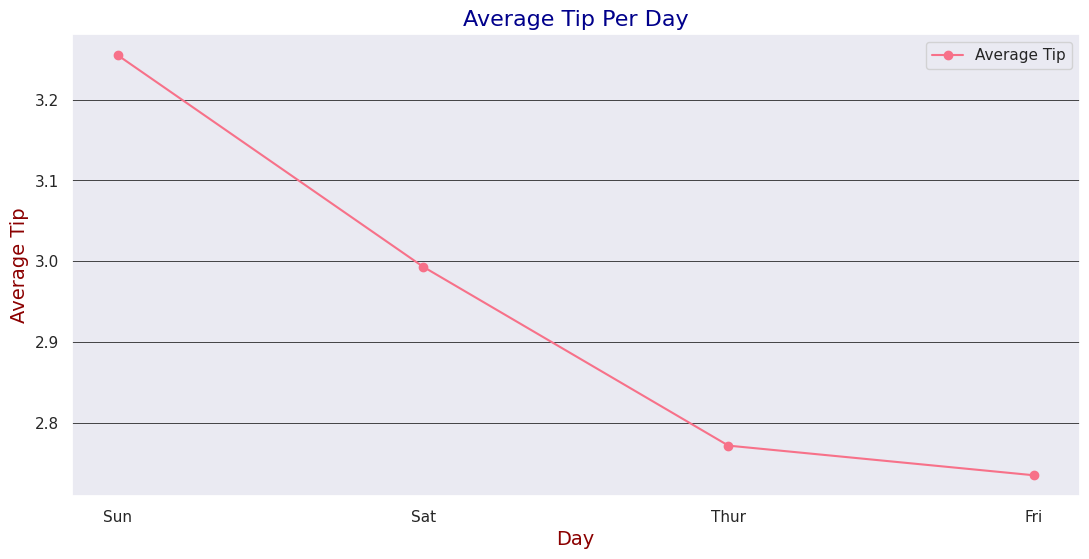

In [78]:
# Group the DataFrame by 'day' and calculate the average tip for each day
avg_tip_per_day = Task_3.groupby('day')['tip'].mean()

# Group the DataFrame by 'day' and calculate the 'average tip' for each day
avg_tip_per_day = avg_tip_per_day.sort_values(ascending = False)

# Create a new figure with a specific size
plt.figure(figsize = (13 , 6))

# Plot the data as a line chart, with markers at data points
avg_tip_per_day.plot(kind = 'line', marker = 'o', color = colors)

# Set the title of the plot
plt.title('Average Tip Per Day', fontsize = 16, color = 'darkblue')

# Set the label for the x-axis
plt.xlabel('Day', fontsize = 14, color = 'darkred')

# Set the label for the y-axis
plt.ylabel('Average Tip', fontsize = 14, color = 'darkred')

# Add a legend to the plot, with a label for the line
plt.legend(['Average Tip'])

# Add grid lines
plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth=0.5)

# Display the plot
plt.show()

### Bar chart for Categorical Columns

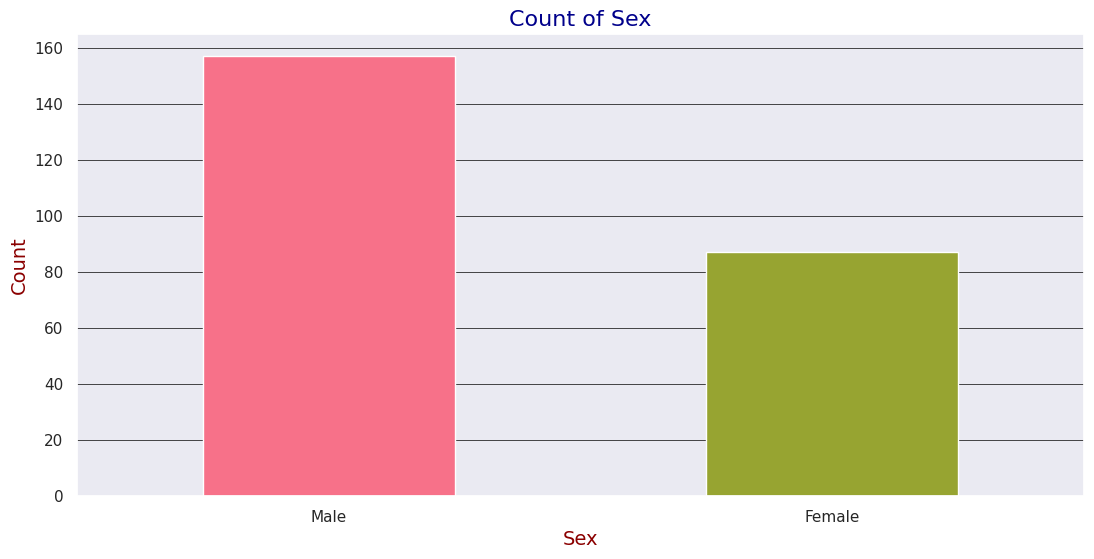

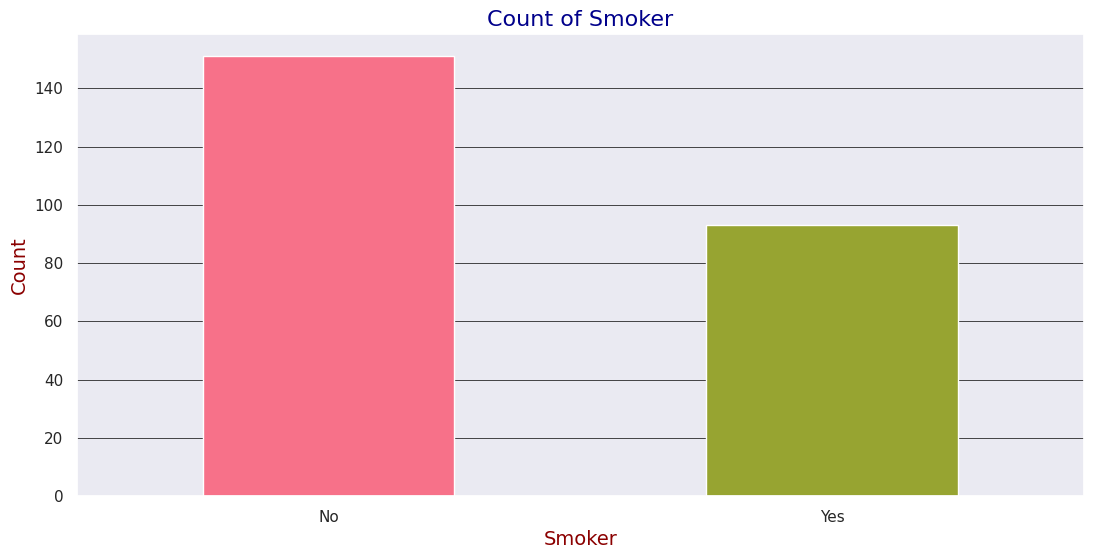

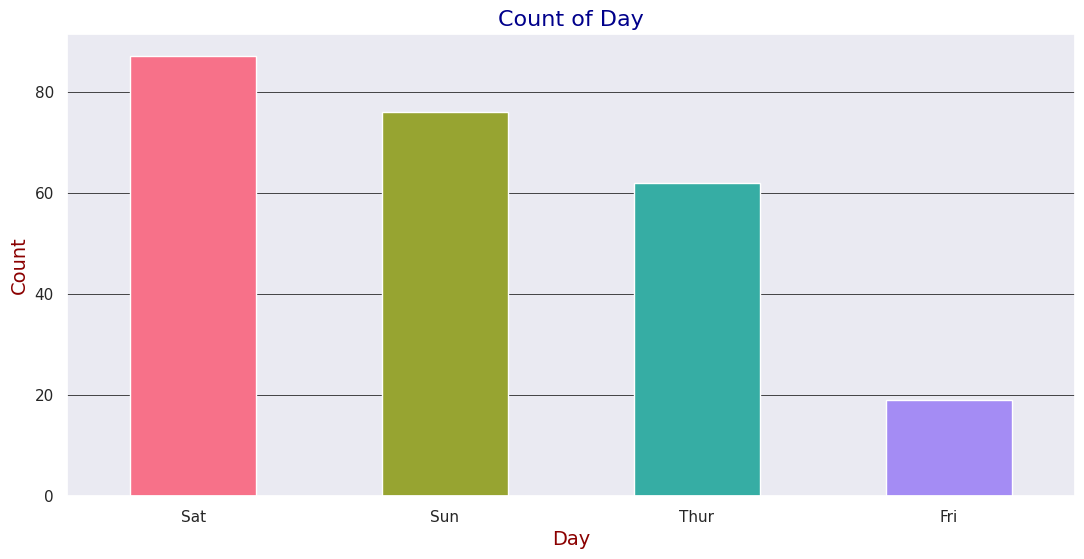

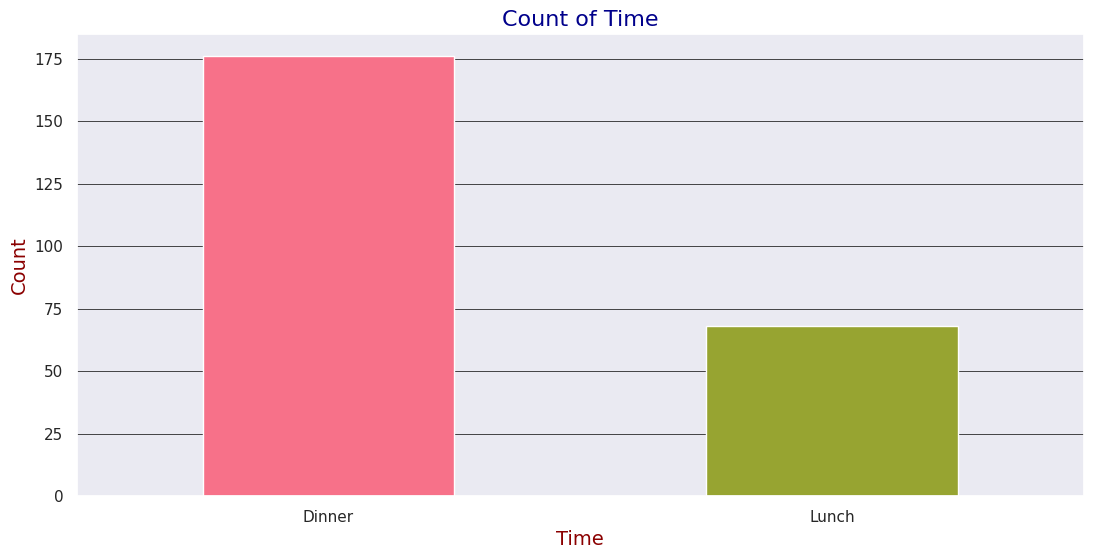

In [77]:
 # Generate a color palette for different colors
colors = sns.color_palette('husl', len(Task_3['day'].unique()))

categorical_columns = ['sex', 'smoker', 'day', 'time'] # categorical columns of dataset in one list
for column in categorical_columns:
    plt.figure(figsize = (13, 6)) # New figure with a specific size
    Task_3[column].value_counts().plot(kind = 'bar', color = colors, zorder = 2) # Plot the value counts of the specified column as a bar plot
    plt.title(f'Count of {column.capitalize()}', fontsize = 16, color = 'darkblue') # Title of the plot, capitalizing the column name for readability
    plt.xlabel(column.capitalize(), fontsize = 14, color = 'darkred') # Label for the x-axis, capitalizing the column name for readability
    plt.ylabel('Count', fontsize = 14, color = 'darkred') # Label the y-axis
    plt.xticks(rotation = 0) # Rotate x-axis tick labels to 0 degrees for better readability
    plt.grid(axis = 'y', color = 'black', linestyle = '-', linewidth = 0.5) # Adding grid lines to the y-axis for better readability
    plt.show() # Display the plot

### Line chart for numerical columns

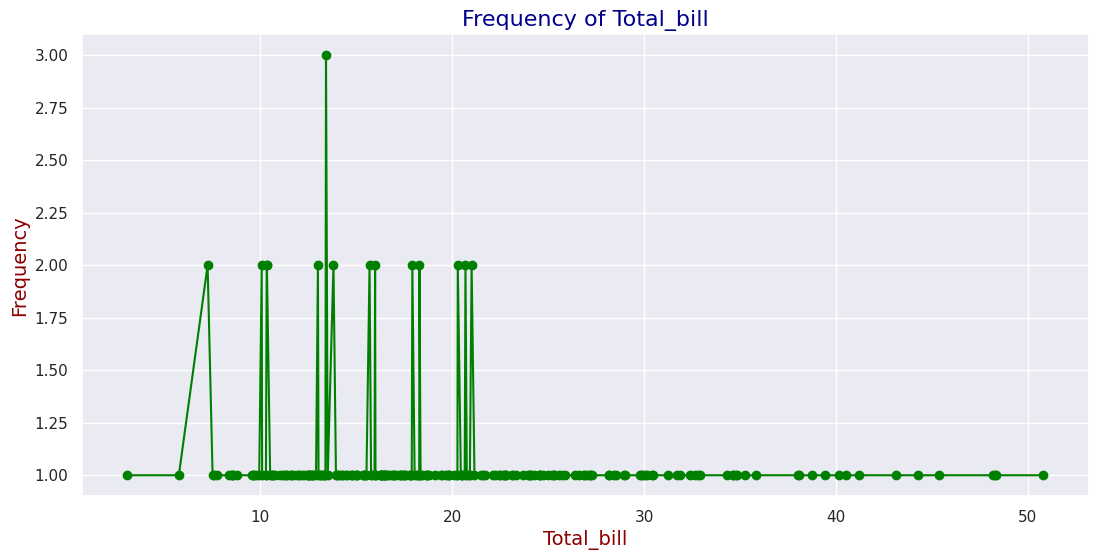

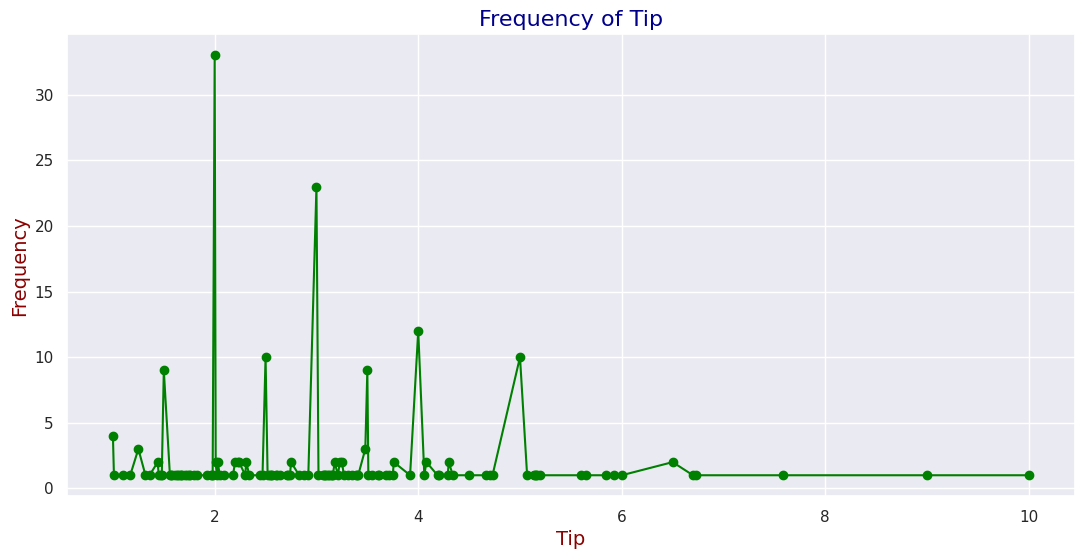

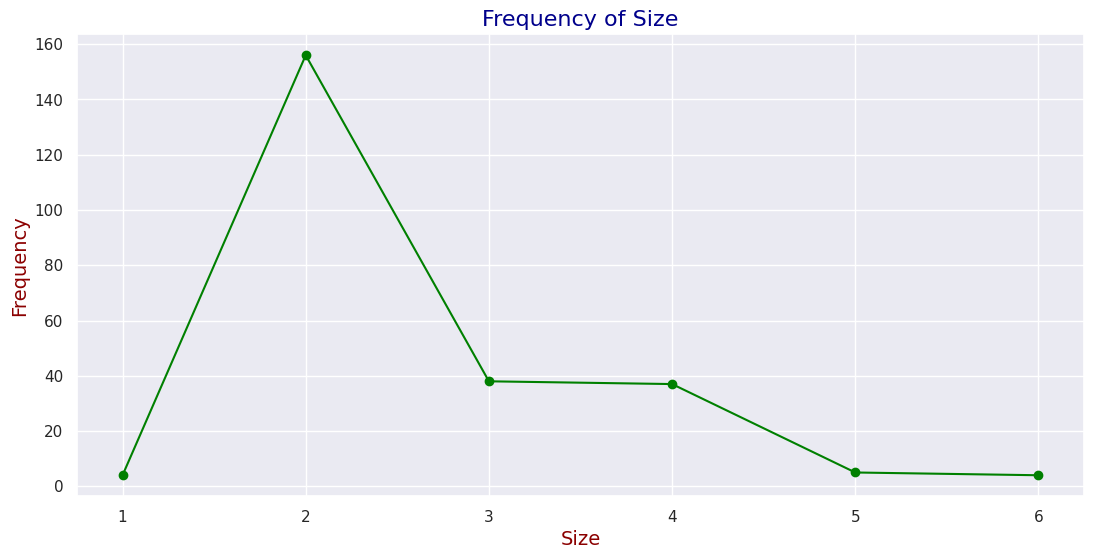

In [76]:
numerical_columns = ['total_bill', 'tip', 'size']
for column in numerical_columns:
    plt.figure(figsize = (13, 6)) # Create a new figure for each plot with a specified figure size

    # Group the DataFrame 'Task_3' by the current column and count the occurrences,
    # Then plot the counts as a line plot with markers at each data point
    Task_3.groupby(column).size().plot(kind = 'line', marker = 'o', color = 'green')

    plt.title(f'Frequency of {column.capitalize()}', fontsize = 16, color = 'darkblue') # # Set the title of the plot, using the capitalized column name
    plt.xlabel(column.capitalize(), fontsize = 14, color = 'darkred') # Set the label for the x-axis, using the capitalized column name
    plt.ylabel('Frequency', fontsize = 14, color = 'darkred')# Set the label for the y-axis as 'Frequency'
    plt.grid(True) # Enable the grid for better readability of the plot
    plt.show() # Display the plot

### Visualization of Smoker and Non-Smoker Counts by Sex

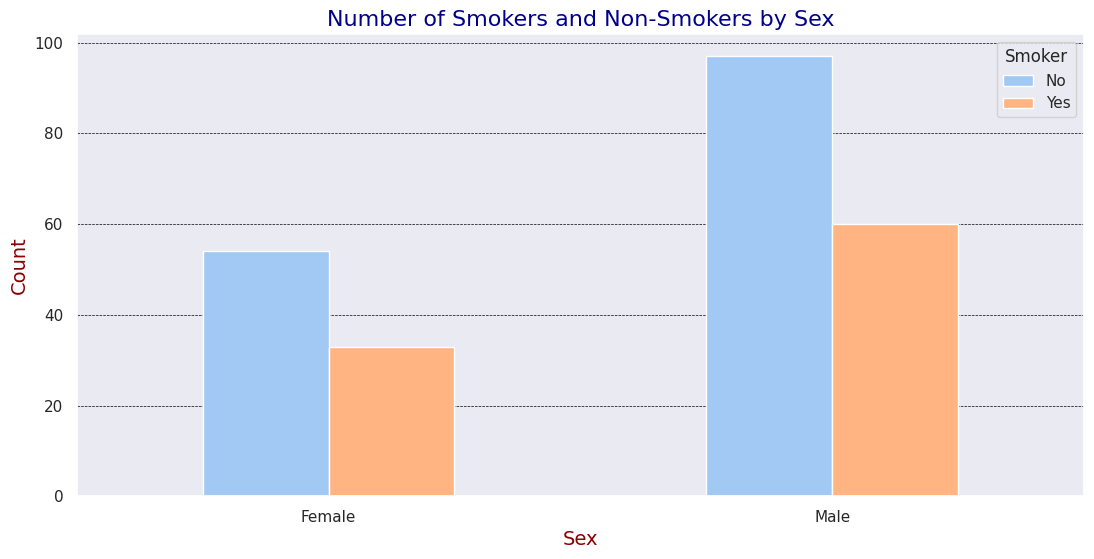

In [75]:
# Group by 'sex' and 'smoker' and count occurrences
smoker_counts = Task_3.groupby(['sex', 'smoker']).size().unstack(fill_value=0)

# Plot the data
fig, ax = plt.subplots(figsize = (13, 6))
smoker_counts.plot(kind ='bar', ax = ax, zorder = 2) # The 'zorder=2' argument ensures that the bars are drawn above the grid lines
ax.set_title('Number of Smokers and Non-Smokers by Sex', fontsize = 16, color = 'darkblue')
ax.set_xlabel('Sex', fontsize = 14, color = 'darkred')
ax.set_ylabel('Count', fontsize = 14, color = 'darkred')
ax.legend(title = 'Smoker')
plt.xticks(rotation = 0)
ax.grid(True, which = 'both', linestyle = '--', linewidth = 0.5, axis = 'y', color = 'black')
plt.show()

### Line Chart: Total Bill and Tip Over Observations

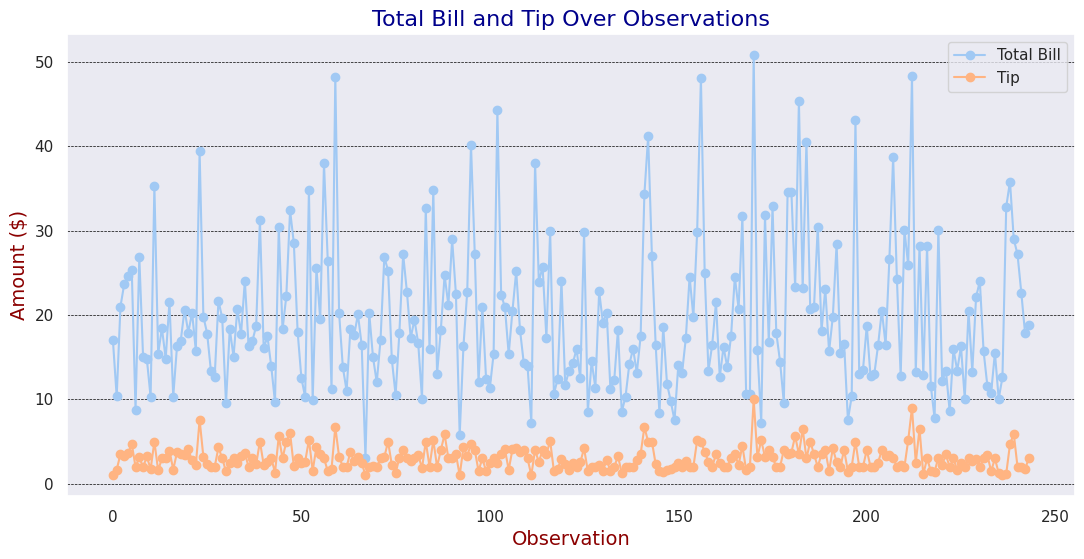

In [74]:
fig, ax = plt.subplots(figsize=(13, 6))
Task_3[['total_bill', 'tip']].plot(kind = 'line', ax = ax, marker = 'o', zorder = 2)
ax.set_title('Total Bill and Tip Over Observations', fontsize = 16, color = 'darkblue')
ax.set_xlabel('Observation', fontsize = 14, color = 'darkred')
ax.set_ylabel('Amount ($)', fontsize = 14, color = 'darkred')
ax.legend(['Total Bill', 'Tip'])
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.show()

### Count of Meals by Size

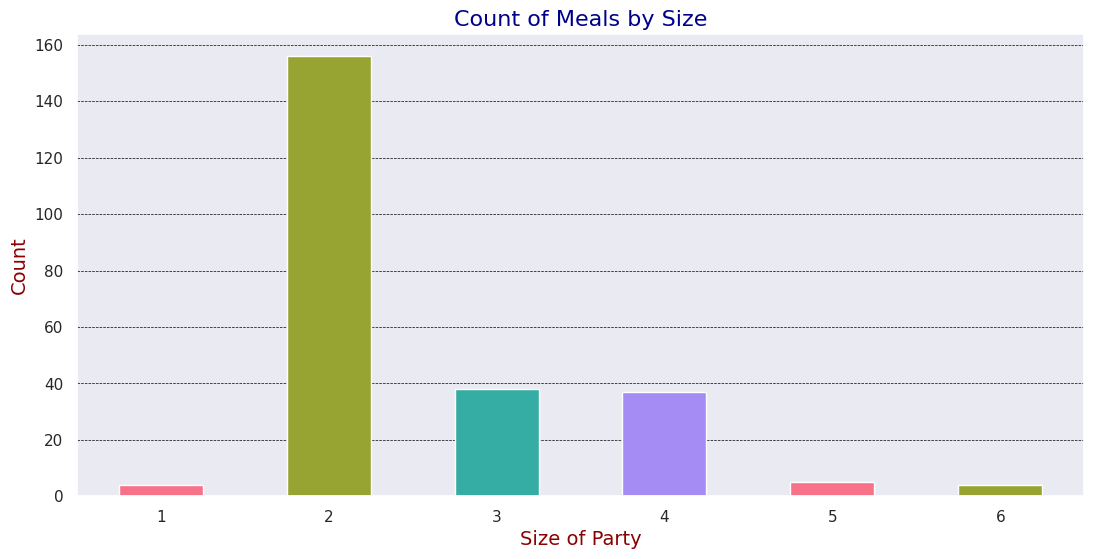

In [73]:
# Generate a color palette for different colors
colors = sns.color_palette('husl', len(Task_3['day'].unique()))

meal_count_by_size = Task_3['size'].value_counts().sort_index()
fig, ax = plt.subplots(figsize = (13, 6))
meal_count_by_size.plot(kind = 'bar', ax = ax, color = colors, zorder = 2)
ax.set_title('Count of Meals by Size', fontsize = 16, color = 'darkblue')
ax.set_xlabel('Size of Party', fontsize = 14, color = 'darkred')
ax.set_ylabel('Count', fontsize = 14, color = 'darkred')
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.xticks(rotation = 0)
plt.show()

### Total Bill by Gender

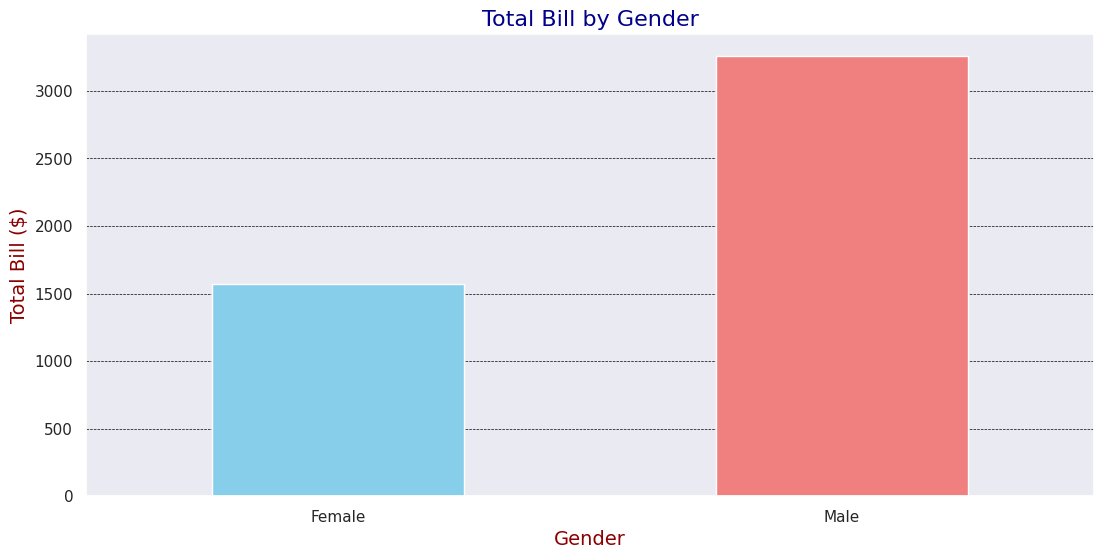

In [72]:
# Colors for the bar plot
colors = ['skyblue', 'lightcoral']

# Group the DataFrame 'Task_3' by the 'sex' column and calculate the sum of 'total_bill' for each gender
total_bill_by_gender = Task_3.groupby('sex')['total_bill'].sum()

# Create a figure and axes for the plot with a specified figure size
fig, ax = plt.subplots(figsize = (13, 6))

# Plot the total bill by gender as a bar chart on the specified Axes 'ax'
# Use the predefined 'colors' for the bars and set 'zorder=2' to draw bars above the grid lines
total_bill_by_gender.plot(kind = 'bar', ax = ax, color = colors, zorder = 2)

ax.set_title('Total Bill by Gender', fontsize = 16, color = 'darkblue')
ax.set_xlabel('Gender', fontsize = 14, color = 'darkred')
ax.set_ylabel('Total Bill ($)', fontsize = 14, color = 'darkred')

# Enable the grid on the y-axis for better readability, with specified style and color
# 'which='both'' means the grid will apply to both major and minor ticks
# 'linestyle' specifies the style of the grid lines
# 'axis='y'' applies the grid only to the y-axis
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')

# Rotate the x-axis labels to 0 degrees (horizontal orientation)
plt.xticks(rotation = 0)

plt.show()

### Average Tip by Time of Day (Lunch/Dinner)

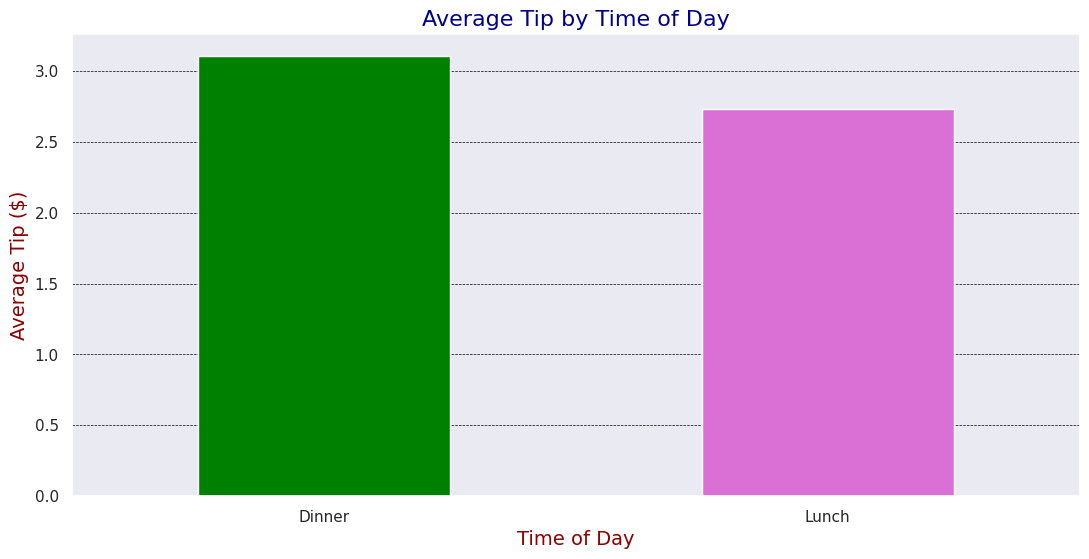

In [70]:
# Colors for the bar plot
colors = ['green', 'orchid']

avg_tip_by_time = Task_3.groupby('time')['tip'].mean()
fig, ax = plt.subplots(figsize = (13, 6))
avg_tip_by_time.plot(kind = 'bar', ax = ax, color = colors, zorder = 2)
ax.set_title('Average Tip by Time of Day', fontsize=16, color = 'darkblue')
ax.set_xlabel('Time of Day', fontsize = 14, color = 'darkred')
ax.set_ylabel('Average Tip ($)', fontsize = 14, color = 'darkred')
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.xticks(rotation=0)
plt.show()

### Average Total bill by Time of Day (Lunch/Dinner)

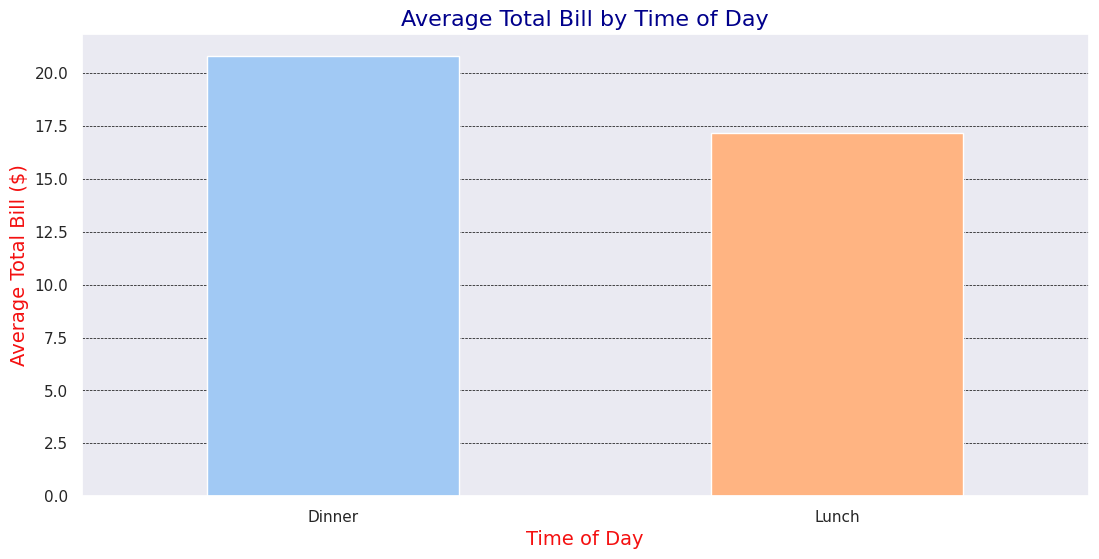

In [71]:
# Set style and palette
sns.set(style="dark", palette="pastel")

# Calculate average total bill by time of day
avg_total_bill_by_time = Task_3.groupby('time')['total_bill'].mean()

# Define the number of unique categories in 'time'
num_colors = len(avg_total_bill_by_time)

# Assign different colors to each bar
colors = sns.color_palette("pastel", n_colors = num_colors)

# Plot the average total bill by time of day
fig, ax = plt.subplots(figsize=(13, 6))
avg_total_bill_by_time.plot(kind='bar', color = colors, ax = ax, zorder = 2)

# Set the title of the plot with dark blue color
ax.set_title('Average Total Bill by Time of Day', fontsize = 16, color = "#00008B")  # '#00008B' defines dark blue color

# Set the label for the x-axis with dark red color
ax.set_xlabel('Time of Day', fontsize = 14, color = '#F41010')  # '#F41010' defines dark red color

# Set the label for the y-axis with dark red color
ax.set_ylabel('Average Total Bill ($)', fontsize = 14, color = '#F41010')

# Enable the grid on the y-axis with specified style and color
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')

# Rotate the x-axis labels to 0 degrees (horizontal orientation)
plt.xticks(rotation = 0)

# Display the plot
plt.show()

### Average Total Bill Over Time by Day

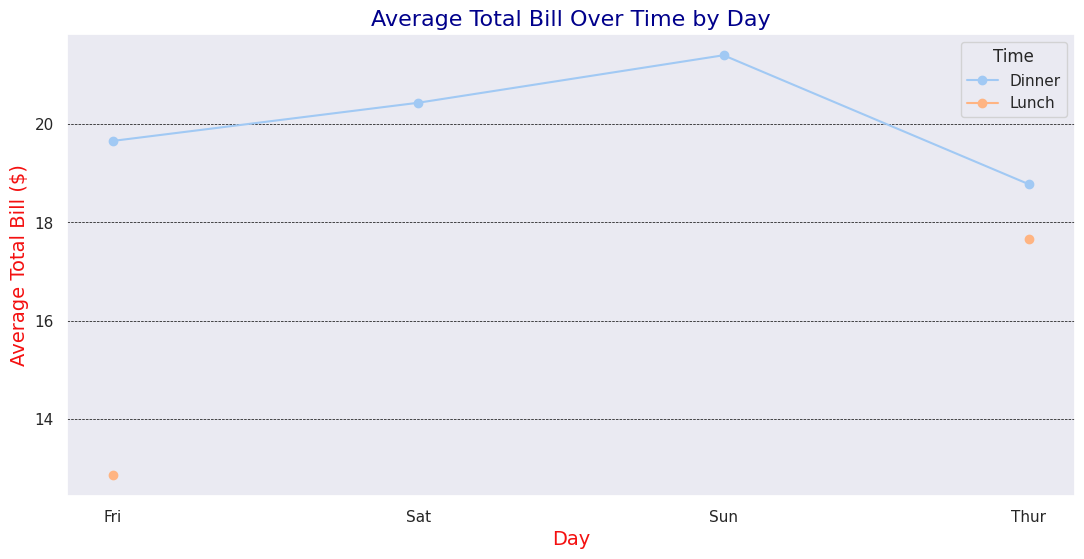

In [67]:
# Calculate average total bill by day and time of day
avg_total_bill_by_day_time = Task_3.groupby(['day', 'time'])['total_bill'].mean().unstack()

# Plot the average total bill by day and time of day
fig, ax = plt.subplots(figsize = (13, 6))
avg_total_bill_by_day_time.plot(kind = 'line', ax=ax, marker='o')
ax.set_title('Average Total Bill Over Time by Day', fontsize = 16, color = "#00008B")
ax.set_xlabel('Day', fontsize = 14, color = '#F41010')
ax.set_ylabel('Average Total Bill ($)', fontsize = 14, color = '#F41010')
ax.legend(title = 'Time')
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.xticks(rotation=0)
plt.show()

### Average Tip by Size of Party

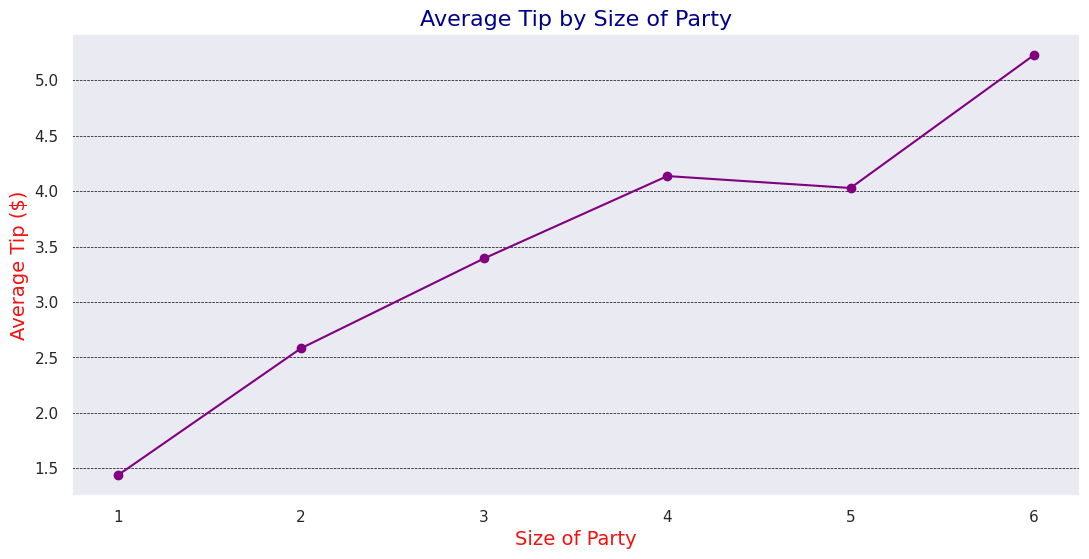

In [66]:
avg_tip_by_size = Task_3.groupby('size')['tip'].mean()
fig, ax = plt.subplots(figsize=(13, 6))
avg_tip_by_size.plot(kind='line', ax = ax, marker = 'o', color = 'purple')
ax.set_title('Average Tip by Size of Party', fontsize = 16, color = "#00008B")
ax.set_xlabel('Size of Party', fontsize = 14, color = '#F41010')
ax.set_ylabel('Average Tip ($)', fontsize = 14, color = '#F41010')
ax.grid(True, which = 'both', linestyle = '--', color = 'black',linewidth = 0.5, axis = 'y')
plt.xticks(rotation = 0)
plt.show()

### Average Total Bill and Tip by Day

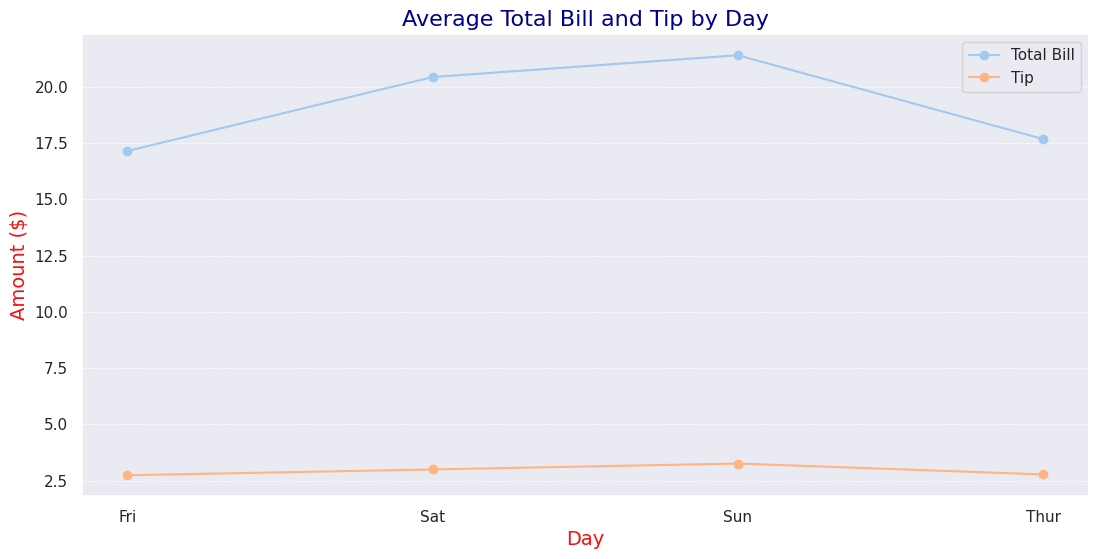

In [65]:
avg_total_bill_tip_by_day = Task_3.groupby('day')[['total_bill', 'tip']].mean()
fig, ax = plt.subplots(figsize = (13, 6))
avg_total_bill_tip_by_day.plot(kind = 'line', ax = ax, marker = 'o')
ax.set_title('Average Total Bill and Tip by Day', fontsize = 16, color = "#00008B")
ax.set_xlabel('Day', fontsize = 14, color = '#F41010')
ax.set_ylabel('Amount ($)', fontsize = 14, color = '#F41010')
ax.legend(['Total Bill', 'Tip'])
ax.grid(True, which = 'both', linestyle = '--', linewidth = 0.5, axis = 'y')
plt.xticks(rotation = 0)
plt.show()

### Total Bill and Tip by Smoker and Non-Smoker

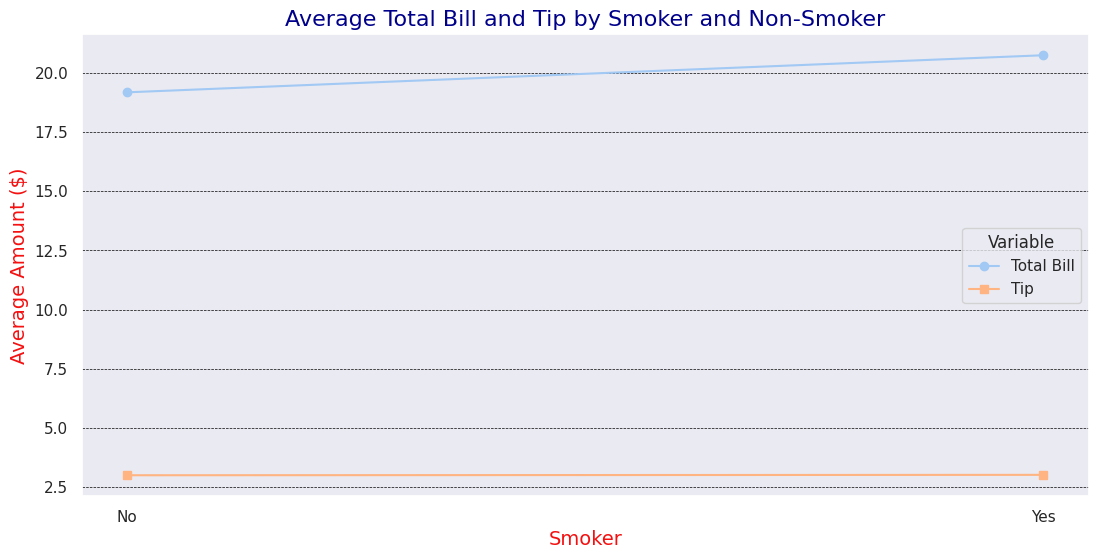

In [64]:
# Calculate average total bill and tip by smoker
avg_values_by_smoker = Task_3.groupby('smoker')[['total_bill', 'tip']].mean()

# Plot the average total bill and tip by smoker
fig, ax = plt.subplots(figsize = (13, 6))

# Plot total bill
ax.plot(avg_values_by_smoker.index, avg_values_by_smoker['total_bill'], marker = 'o', label = 'Total Bill')
# Plot tip
ax.plot(avg_values_by_smoker.index, avg_values_by_smoker['tip'], marker = 's', label = 'Tip')

ax.set_title('Average Total Bill and Tip by Smoker and Non-Smoker', fontsize = 16, color = "#00008B")
ax.set_xlabel('Smoker', fontsize = 14, color = '#F41010')
ax.set_ylabel('Average Amount ($)', fontsize = 14, color = '#F41010')
ax.legend(title = 'Variable')
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.xticks(rotation = 0)
plt.show()

### Bar Plot: Total Bill by Day and Gender

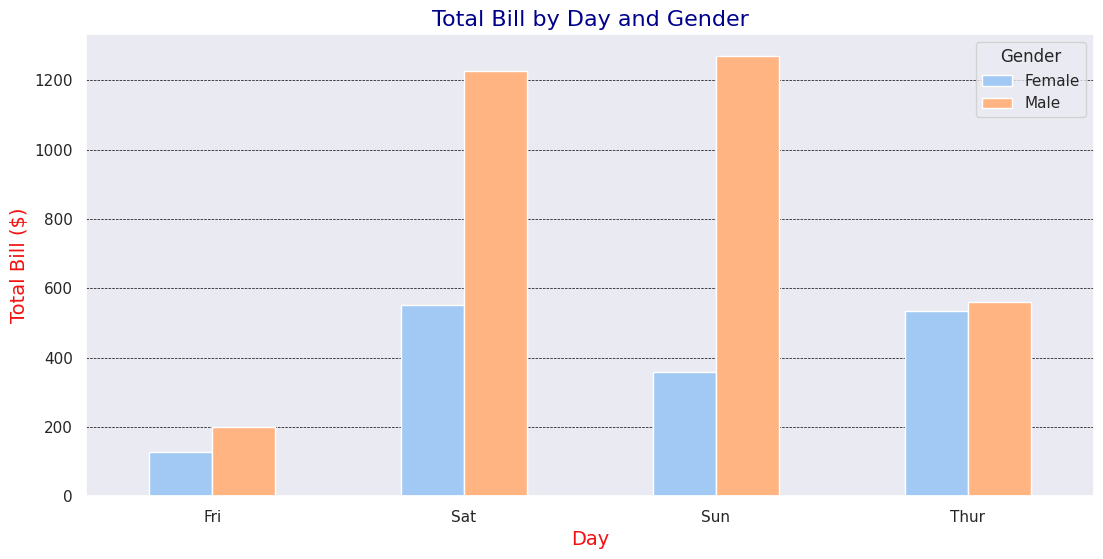

In [63]:
# Calculate total bill by day and gender
total_bill_by_day_gender = Task_3.groupby(['day', 'sex'])['total_bill'].sum().unstack()

# Plot the total bill by day and gender
fig, ax = plt.subplots(figsize = (13, 6))
total_bill_by_day_gender.plot(kind = 'bar', ax = ax, zorder = 2)
ax.set_title('Total Bill by Day and Gender', fontsize = 16, color = "#00008B")
ax.set_xlabel('Day', fontsize = 14, color = '#F41010')
ax.set_ylabel('Total Bill ($)', fontsize = 14, color = '#F41010')
ax.legend(title = 'Gender')
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.xticks(rotation = 0)
plt.show()

### Total Bill by Day and Time

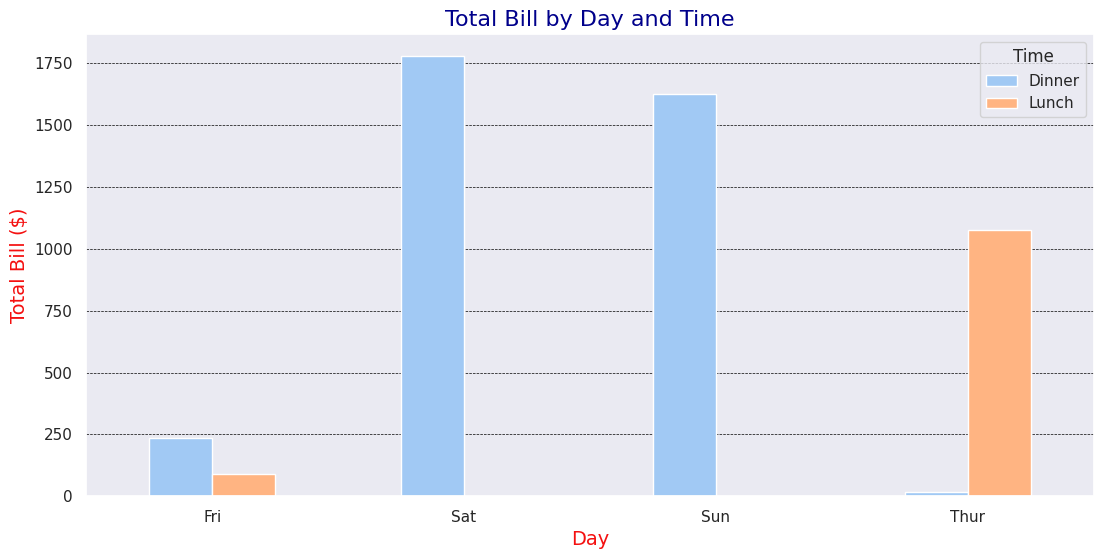

In [62]:
# Calculate total bill by day and time
total_bill_by_day_time = Task_3.groupby(['day', 'time'])['total_bill'].sum().unstack()

# Plot the total bill by day and time
fig, ax = plt.subplots(figsize = (13, 6))
total_bill_by_day_time.plot(kind = 'bar', ax = ax)
ax.set_title('Total Bill by Day and Time', fontsize = 16, color = "#00008B")
ax.set_xlabel('Day', fontsize = 14, color = '#F41010')
ax.set_ylabel('Total Bill ($)', fontsize = 14, color = '#F41010')
ax.legend(title = 'Time')
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.xticks(rotation = 0)
plt.show()

### Average Total Bill by Size

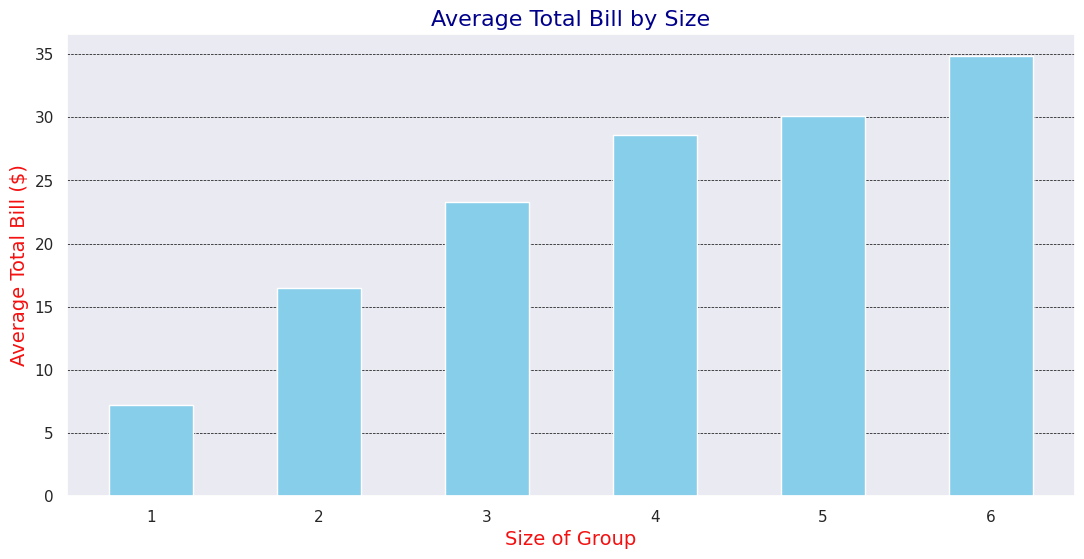

In [61]:
# Calculate average total bill by size
avg_total_bill_by_size = Task_3.groupby('size')['total_bill'].mean()

# Plot the average total bill by size
fig, ax = plt.subplots(figsize = (13, 6))
avg_total_bill_by_size.plot(kind='bar', ax=ax, color='skyblue', zorder = 2)
ax.set_title('Average Total Bill by Size', fontsize = 16, color = "#00008B")
ax.set_xlabel('Size of Group', fontsize = 14, color = '#F41010')
ax.set_ylabel('Average Total Bill ($)', fontsize = 14, color = '#F41010')
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.xticks(rotation = 0)
plt.show()

### Number of Smokers and Non-smokers by total_bill

To create a bar plot showing the number of smokers and non-smokers categorized by the total bill, we need to:

1) Categorize the total bill into bins.
2) Count the number of smokers and non-smokers in each bin.
3) Plot the counts as a bar plot.

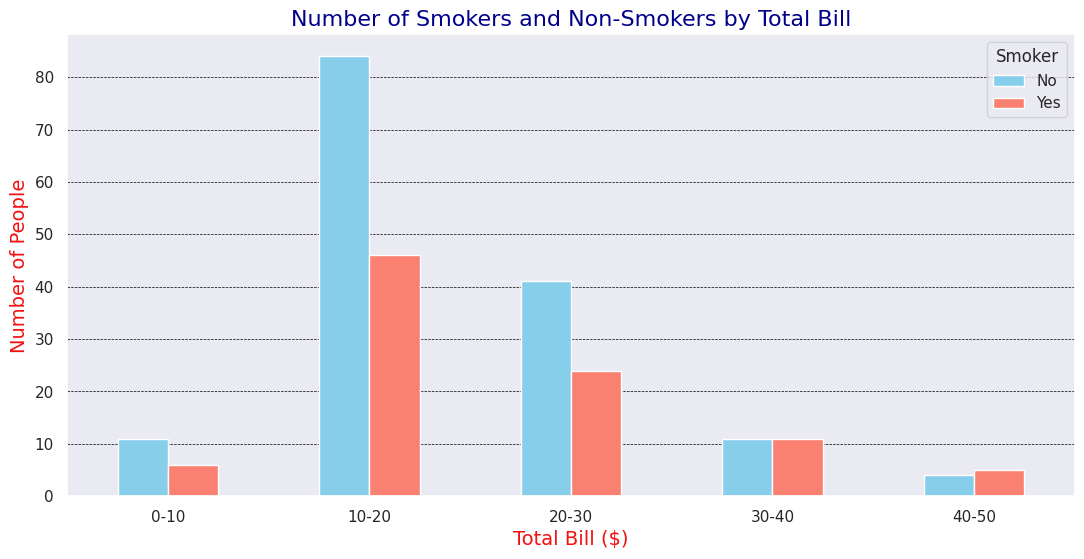

In [60]:
# Categorize total_bill into bins
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50']
Task_3['total_bill_bin'] = pd.cut(Task_3['total_bill'], bins = bins, labels = labels)

# Count the number of smokers and non-smokers in each bin
smoker_counts = Task_3.groupby(['total_bill_bin', 'smoker']).size().unstack().fillna(0)

# Plot the counts as a bar plot
fig, ax = plt.subplots(figsize = (13, 6))
smoker_counts.plot(kind = 'bar', ax = ax, color = ['skyblue', 'salmon'], zorder = 2)
ax.set_title('Number of Smokers and Non-Smokers by Total Bill', fontsize = 16, color = "#00008B")
ax.set_xlabel('Total Bill ($)', fontsize = 14, color = '#F41010')
ax.set_ylabel('Number of People', fontsize = 14, color = '#F41010')
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.xticks(rotation = 0)
plt.legend(title = 'Smoker')
plt.show()

### Number of Smokers and Non-smokers by tip

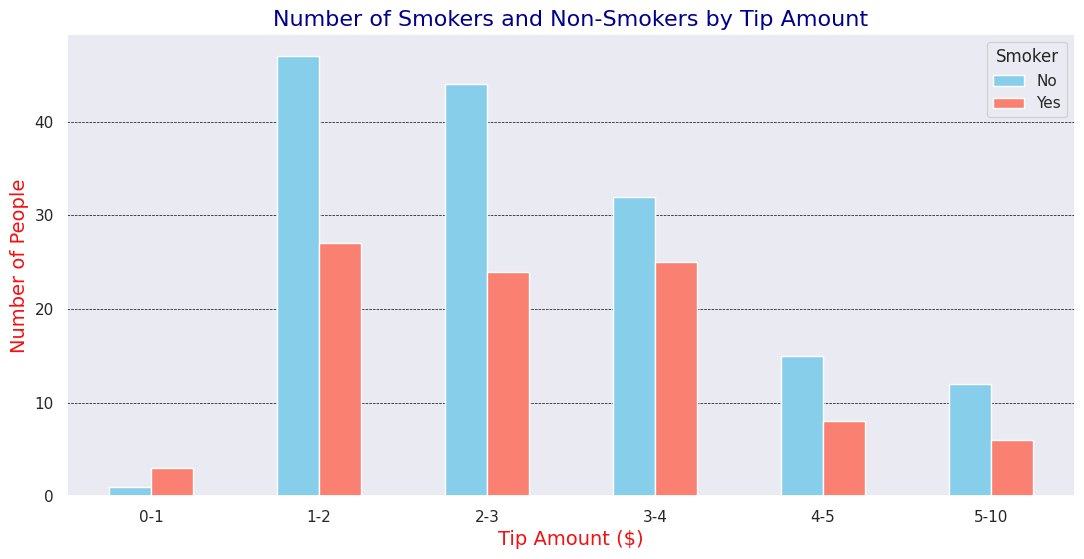

In [59]:
# Categorize tip into bins
bins = [0, 1, 2, 3, 4, 5, 10]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-10']
Task_3['tip_bin'] = pd.cut(Task_3['tip'], bins = bins, labels = labels)

# Count the number of smokers and non-smokers in each bin
smoker_counts_by_tip = Task_3.groupby(['tip_bin', 'smoker']).size().unstack().fillna(0)

# Plot the counts as a bar plot
fig, ax = plt.subplots(figsize = (13, 6))
smoker_counts_by_tip.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], zorder=2)
ax.set_title('Number of Smokers and Non-Smokers by Tip Amount', fontsize = 16, color = "#00008B")
ax.set_xlabel('Tip Amount ($)', fontsize = 14, color = '#F41010')
ax.set_ylabel('Number of People', fontsize = 14, color = '#F41010')
ax.grid(True, which='both', linestyle='--', color='black', linewidth=0.5, axis='y')
plt.xticks(rotation = 0)
plt.legend(title = 'Smoker')
plt.show()

### Average total bill by sex, smoker, and time

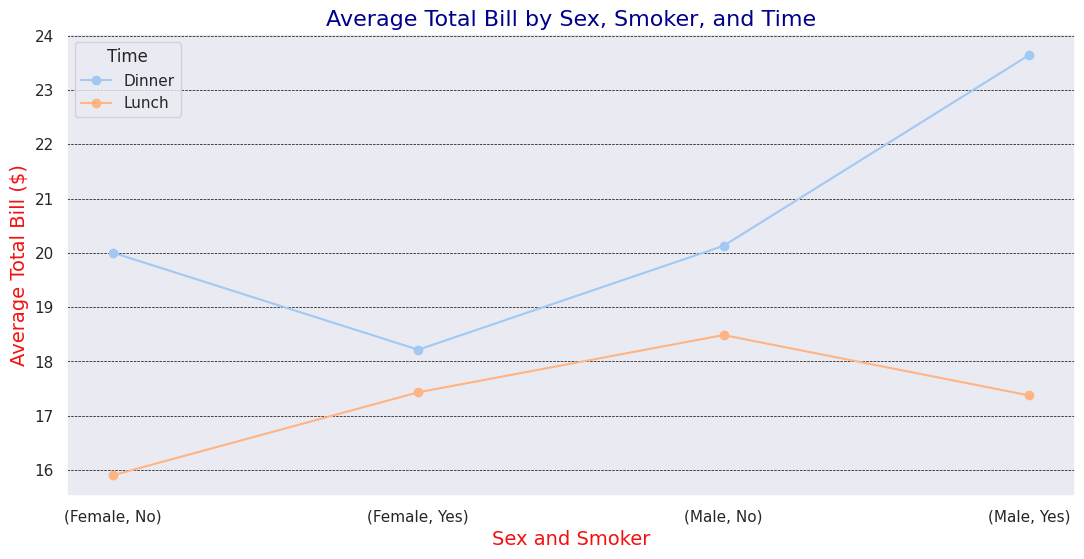

In [58]:
# Calculate average total bill by sex, smoker, and time
avg_total_bill = Task_3.groupby(['sex', 'smoker', 'time'])['total_bill'].mean().unstack()

# Plot the average total bill
fig, ax = plt.subplots(figsize = (13, 6))
avg_total_bill.plot(kind='line', marker = 'o', ax = ax)
ax.set_title('Average Total Bill by Sex, Smoker, and Time', fontsize = 16, color = "#00008B")
ax.set_xlabel('Sex and Smoker', fontsize = 14, color = '#F41010')
ax.set_ylabel('Average Total Bill ($)', fontsize = 14, color = '#F41010')
ax.legend(title = 'Time')
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.xticks(rotation = 0)
plt.show()

### Count of each combination of sex, smoker, and time

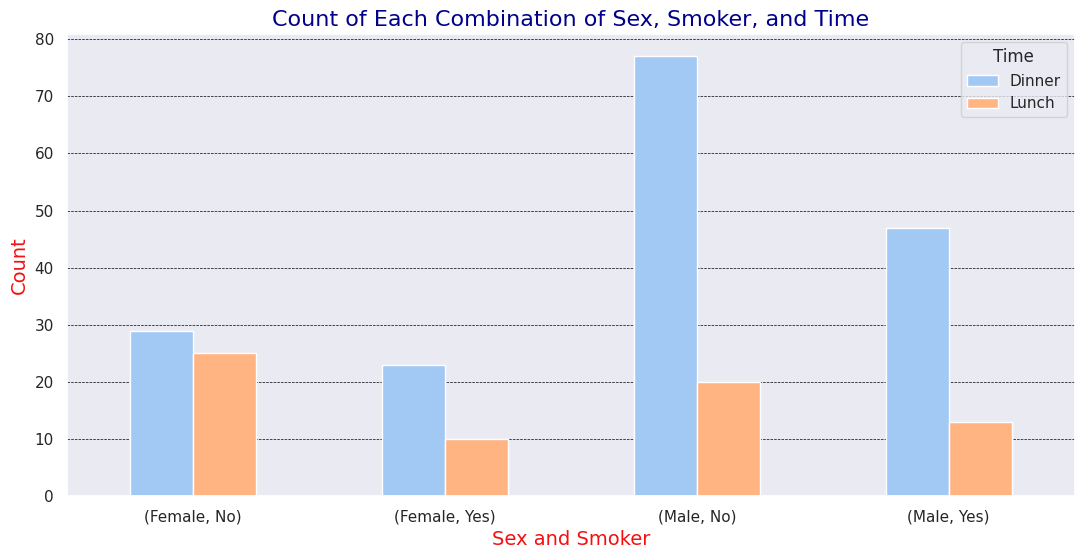

In [57]:
# Count the number of each combination of sex, smoker, and time
count_by_group = Task_3.groupby(['sex', 'smoker', 'time']).size().unstack(fill_value=0)

# Plot the counts
fig, ax = plt.subplots(figsize = (13, 6))
count_by_group.plot(kind='bar', ax = ax, zorder = 2)
ax.set_title('Count of Each Combination of Sex, Smoker, and Time', fontsize = 16, color = "#00008B")
ax.set_xlabel('Sex and Smoker', fontsize = 14, color = '#F41010')
ax.set_ylabel('Count', fontsize = 14, color = '#F41010')
ax.legend(title = 'Time')
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.xticks(rotation = 0)
plt.show()

### Count of smokers and non-smokers who had Dinner and Lunch

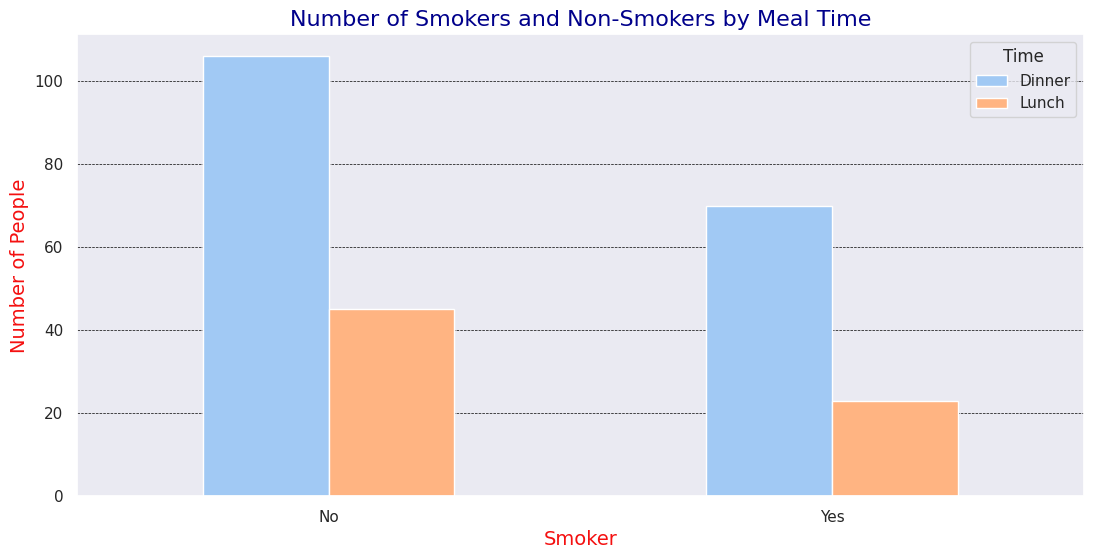

In [49]:
# Count the number of smokers and non-smokers who had Dinner and Lunch
smoker_time_counts = Task_3.groupby(['smoker', 'time']).size().unstack().fillna(0)

# Plot the counts as a bar plot
fig, ax = plt.subplots(figsize = (13, 6))
smoker_time_counts.plot(kind = 'bar', ax = ax, zorder = 2)
ax.set_title('Number of Smokers and Non-Smokers by Meal Time', fontsize = 16, color = "#00008B")
ax.set_xlabel('Smoker', fontsize = 14, color = '#F41010')
ax.set_ylabel('Number of People', fontsize = 14, color = '#F41010')
ax.grid(True, which='both', linestyle='--', color='black', linewidth=0.5, axis='y')
plt.xticks(rotation=0)
plt.legend(title='Time')
plt.show()

### Count of Males and Females who had Dinner or Lunch on each day

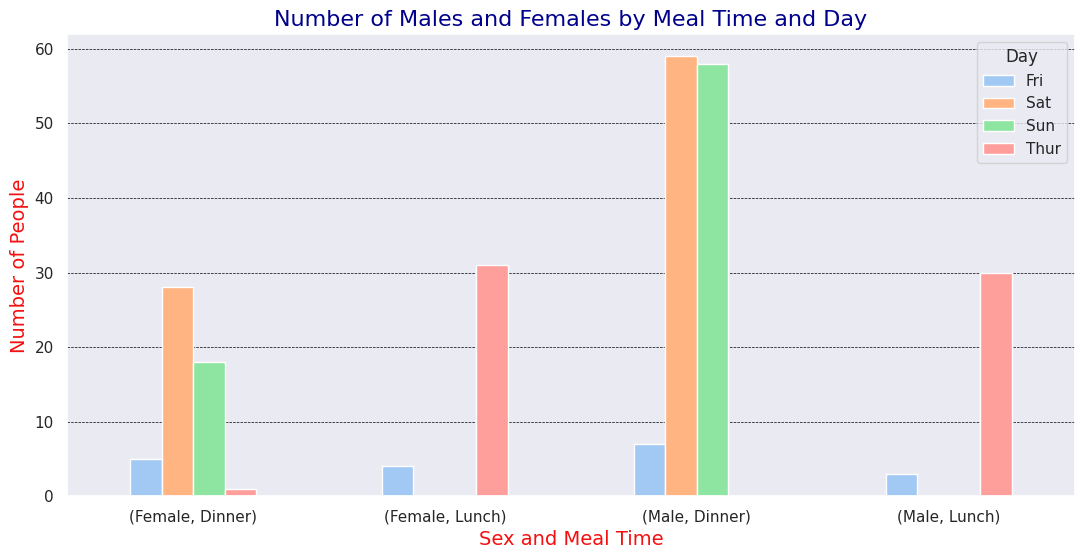

In [48]:
# Count the number of males and females who had Dinner or Lunch on each day
sex_time_day_counts = Task_3.groupby(['sex', 'time', 'day']).size().unstack().fillna(0)

# Plot the counts as a bar plot
fig, ax = plt.subplots(figsize = (13, 6))
sex_time_day_counts.plot(kind = 'bar', ax = ax, zorder = 2)
ax.set_title('Number of Males and Females by Meal Time and Day', fontsize = 16, color = "#00008B")
ax.set_xlabel('Sex and Meal Time', fontsize = 14, color = '#F41010')
ax.set_ylabel('Number of People', fontsize = 14, color = '#F41010')
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.xticks(rotation = 0)
plt.legend(title = 'Day')
plt.show()

### Number of Smokers and Non-Smokers by Meal Time and Day

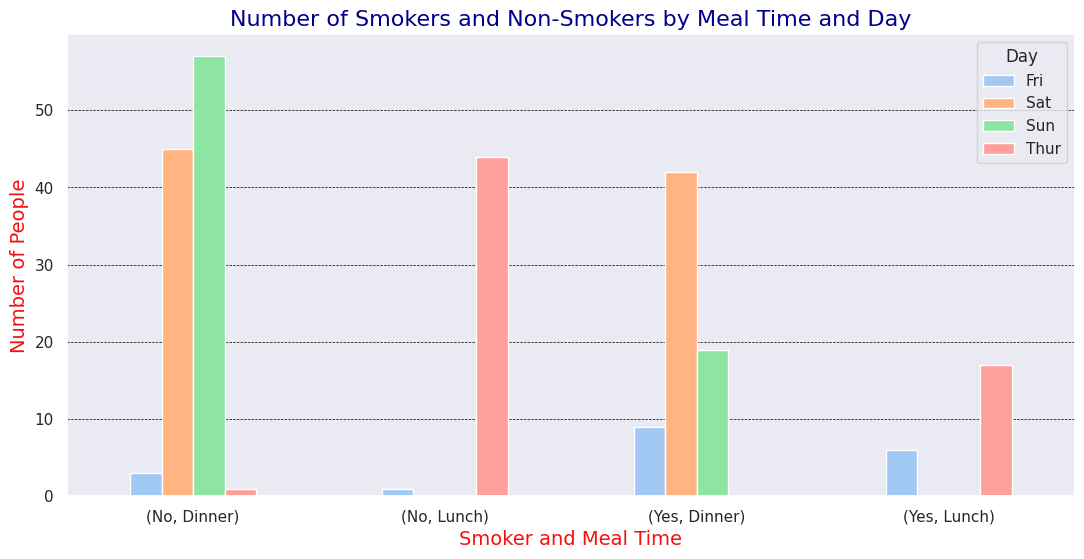

In [50]:
# Count the number of smokers and non-smokers who had Dinner or Lunch on each day
smoker_time_day_counts = Task_3.groupby(['smoker', 'time', 'day']).size().unstack().fillna(0)

# Plot the counts as a bar plot
fig, ax = plt.subplots(figsize = (13, 6))
smoker_time_day_counts.plot(kind = 'bar', ax = ax, zorder = 2)
ax.set_title('Number of Smokers and Non-Smokers by Meal Time and Day', fontsize = 16, color = "#00008B")
ax.set_xlabel('Smoker and Meal Time', fontsize = 14, color = '#F41010')
ax.set_ylabel('Number of People', fontsize = 14, color = '#F41010')
ax.grid(True, which = 'both', linestyle = '--', color = 'black', linewidth = 0.5, axis = 'y')
plt.xticks(rotation = 0)
plt.legend(title = 'Day')
plt.show()

### Average number of Customers(Size) by Day

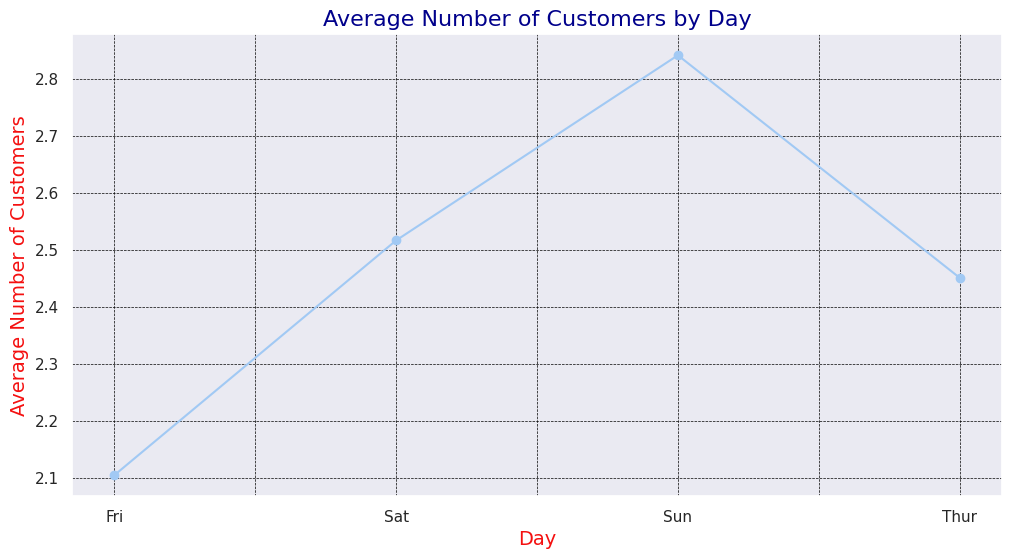

In [54]:
avg_size_by_day = Task_3.groupby('day')['size'].mean()
fig, ax = plt.subplots(figsize = (12, 6))
avg_size_by_day.plot(kind = 'line', marker = 'o', ax = ax)
ax.set_title('Average Number of Customers by Day', fontsize = 16, color = "#00008B")
ax.set_xlabel('Day', fontsize = 14, color = '#F41010')
ax.set_ylabel('Average Number of Customers', fontsize = 14, color = '#F41010')
ax.grid(True, which = 'both', color = 'black', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation = 0)
plt.show()

### Histograms for Numerical Columns

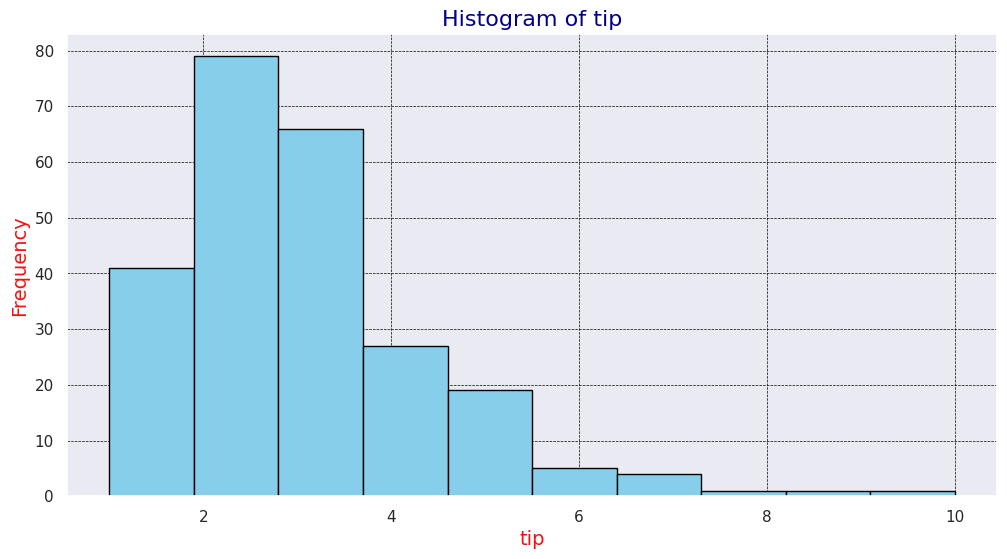

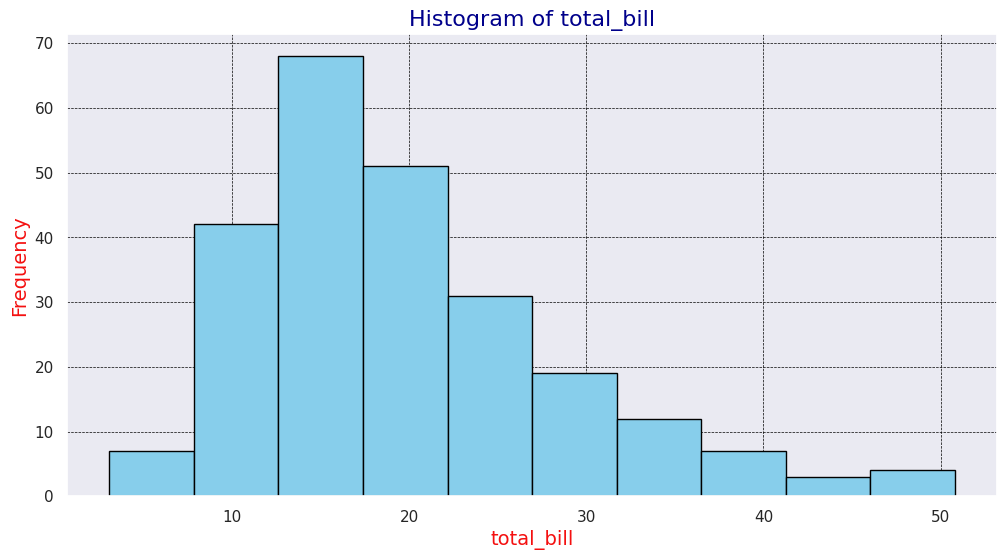

In [55]:
# Select numerical columns
numerical_columns = Task_3.select_dtypes(include = ['float64', 'int64']).columns.difference(['size'])

# Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize = (12, 6))
    Task_3[column].plot(kind = 'hist', bins = 10, color = 'skyblue', edgecolor = 'black', zorder = 2)
    plt.title(f'Histogram of {column}', fontsize = 16, color = "#00008B")
    plt.xlabel(column, fontsize = 14, color = '#F41010')
    plt.ylabel('Frequency', fontsize = 14, color = '#F41010')
    plt.grid(True, linestyle = '--', color = 'black', linewidth = 0.5)
    plt.show()